# Predicting heart-disease using machine learning

This notebook is looks into various Python-based machine learning and data science libraries in an attempt to build a machine learing model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approache:
1. Problem definition.
2. Data
3. Evaluation.
4. Features.
5. Modelling.
6. Experimentaion.

## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data

The Orginal data come from Cleavland data from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it in Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation

> If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll persue the project. 

## Features

There is where we can get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Prepering tools

We're going to use Pandas, Numpy, Matplotlib for data analysis and manipulation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we're going to show plots in our notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset your're working with.
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# find out how many class is there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

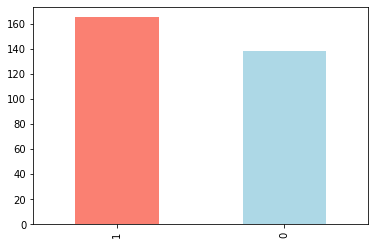

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
# 1 is male, 0 is female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


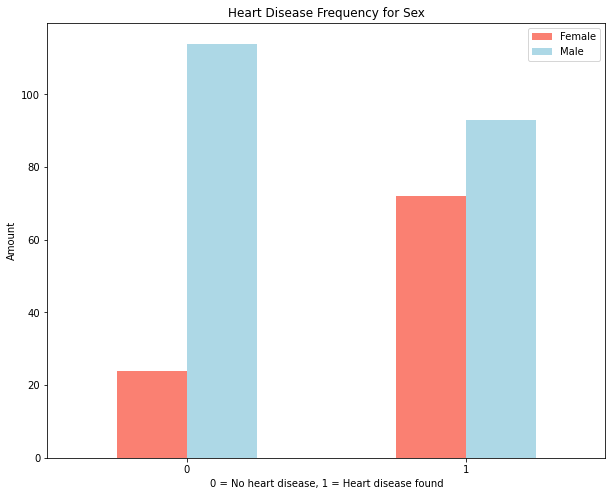

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize = (10,8),
                                    color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart disease, 1 = Heart disease found")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

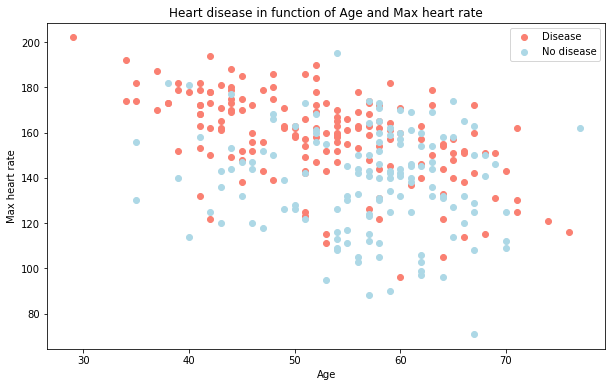

In [13]:
# Create figure
plt.figure(figsize=(10, 6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'salmon')

# scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target == 0],
            c = 'lightblue')

# add info
plt.title('Heart disease in function of Age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No disease']);

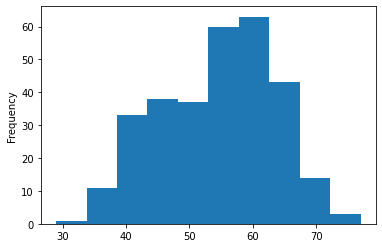

In [14]:
# check the distribution of the age column with a histogram.
df.age.plot.hist();

### Heart disease frequency per Chest pain type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


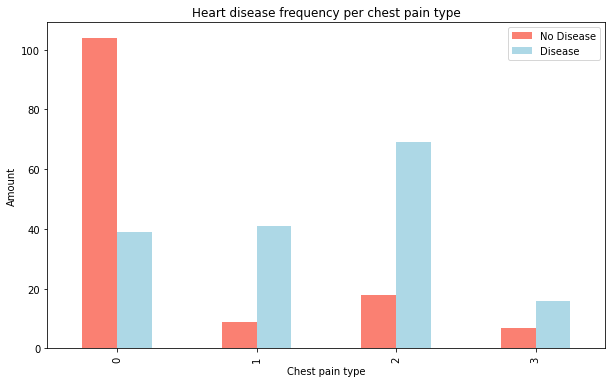

In [16]:
# make more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue']);
# add some info
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);

In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


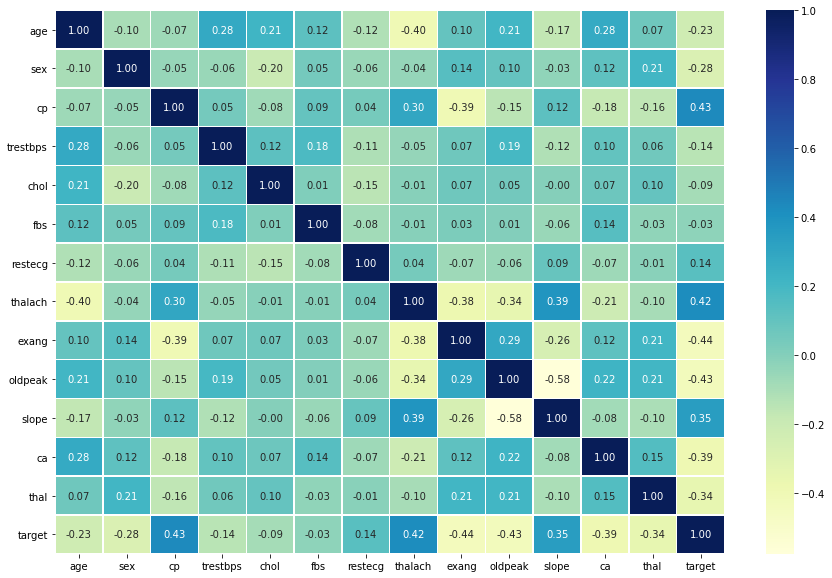

In [18]:
# make correlation more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# split data into X & y
X = df.drop('target', axis= 1)
y = df['target']

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [82]:
# setup random seed
np.random.seed(42)

# split our data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [83]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [84]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

We've splitted our data into train and test.

We train our model (find the patterns) by training set.

We test our model (use the patterns) by testing set.

The models we're going to try:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [85]:
# create a dictionary of our models
models = {'LogisticRegression' : LogisticRegression(),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'RandomForestClassifier' : RandomForestClassifier()}
# create a function for fit and score our models
def fit_score_model(models, X_train, X_test, y_train, y_test):
    '''
    Fit and Score our sklearn machine learning models.
    models : a dict of our models.
    X_train : training data (not labeled).
    X_test : testing data (not labeled).
    y_train : train labels.
    y_test : test labels.
    '''
    # set random seed
    np.random.seed(42)
    # create an empty dictionary for saving results
    model_scores = {}
    # create a loop for go through our models
    for name, model in models.items():
        # fit the models
        model.fit(X_train, y_train)
        # evaluate models
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [86]:
model_scores = fit_score_model(models = models,
                               X_train = X_train,
                               X_test = X_test,
                               y_train = y_train,
                               y_test = y_test)
model_scores

/home/kaen/Projects/Machine-Learning/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

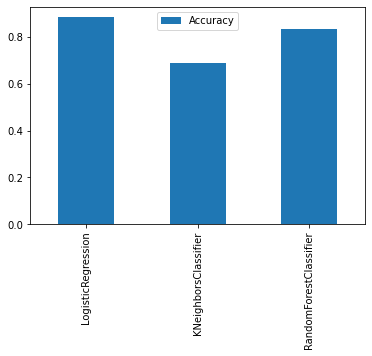

In [87]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])

model_compare.T.plot.bar();

When we've got our baseline model. But we know that a baseline model couldn't be the best model for our problem. So we should:
* Hyperparametet tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

Try with KNeighborsClassifier()

In [88]:
# Create list for saving scores
train_scores = []
test_scores = []
# Create a list of differents range for hyperparams
neighbors = range(1, 21)
# instanciate from our model
knn = KNeighborsClassifier()
# loop through differents values of n_neighbours for tuning 
for i in neighbors:
    # set the n_neighbours parameter
    knn.set_params(n_neighbors = i)
    # fit model
    knn.fit(X_train, y_train)
    # score model with train sets
    train_scores.append(knn.score(X_train, y_train))
    # score model with test sets
    test_scores.append(knn.score(X_test, y_test))

In [89]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [90]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Scores of accuracy is : 75.41%


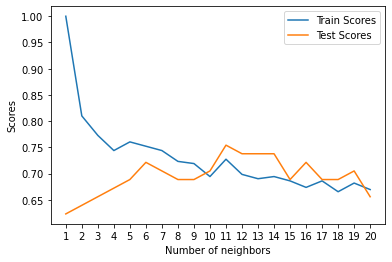

In [91]:
# Visualise the results
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.ylabel("Scores")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.legend();

print(f'Maximum Scores of accuracy is : {max(test_scores)*100:.2f}%')

## Hyperparameter tuning by RandomizedSearchedCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchedCV

In [92]:
# Create a grid for tuning LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":['liblinear']}
# Create a grid for tuning RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got our params distributions, let's try for our model

In [93]:
# setup RandomSeed
np.random.seed(42)

# Setup RandomizedSearchCv for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit tuned logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [94]:
# get best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [95]:
# score tuned model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [96]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

Using RandomizedSearchCv for tuning RandomForestClassifier...

In [97]:
# setup random seed
np.random.seed(42)

# setup RandomizedSearchCv for RandomForestClassiifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter = 20,
                           cv = 5,
                           verbose=True)
# fit our tuned model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [98]:
# get best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [99]:
# score the tuned model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [100]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCv

In [101]:
# create a list of different hyperparameter for our LogisiticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ["liblinear"]}
# setup GridSearchCv for our LogisticRegression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose = True)
# fit our tuned model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [102]:
# find best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
# score our tuned model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifer, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Rcall
* F1-score

... and it would be greate if cross-validation was used where possible.

**To make comparisons and evaluate our trained model, first we need to make prediction**

In [104]:
# make prediction
y_preds = gs_log_reg.predict(X_test)

In [105]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [106]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

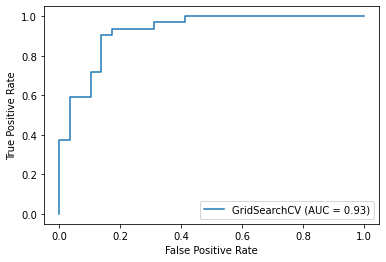

In [108]:
# Import ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,
               X_test,
               y_test);

In [112]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]])

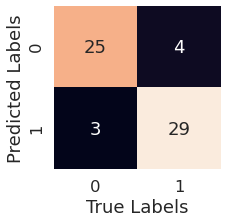

In [120]:
# visualise confusion matrix with seaborn

# set font size
sns.set(font_scale=1.5)

# define a function for plotting confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix result with seaborn's heatmap
    """
    # make plot
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    
plot_conf_mat(y_test, y_preds)

In [122]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using Cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model and using cross validation. To do so we're going to use `cross_val_score()`.

1. Recreate another model with best tuned paramters.
2. Evaluate our new model.

In [123]:
# check the best paramaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [124]:
# create another model with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver = 'liblinear')

In [126]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [127]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [128]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [129]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

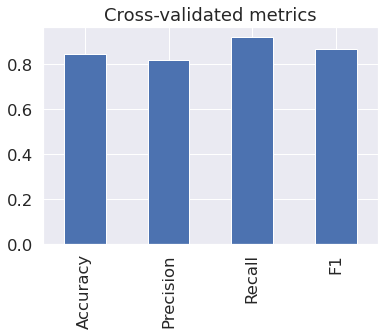

In [132]:
# Visualise Cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated metrics",legend= False);

## Feature importance
Feature importance is another way of asking, "What featrues contributed most to the outcomes and how did they contribute?"

**Finding feature importance is different for each machine learning model.**

To understand how we can figure out this we can search for "(MODEL NAME) feature importance"?

In [138]:
# fit an instanciate of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = "liblinear")
clf.fit(X_train, y_train);

In [139]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [142]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

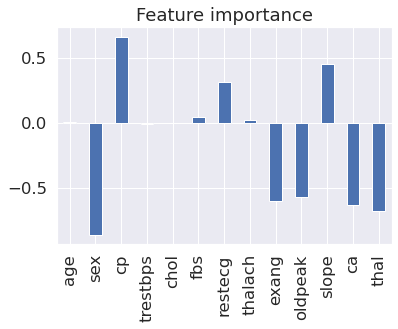

In [145]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature importance", legend = False);

In [146]:
# compare sex and target
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [147]:
# compare slope and target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation

In this step:

If our model is not good enough we should try again by:
* Collecting more data, using another model such as XGBoost or CatBoost, improving our model by tuning more hyperparameters.

And if it works perfectly as well as we need:
* We can export it and share our model.